# Welcome to the Ai/ML Meetup - Friday, April 19th, 2019

## I am a fellow Data Scientist & Python Developer in Building #600

# My talk today is focused on how we can use the various ML tools available to us to build more complex and insightful models.
# I will be using the tools developed by Google based on a talk I saw last weekend at PyTexas

In [6]:
%%HTML
<img src="pytexas_2019.png" width="400"/>
<img src="google-cloud-platform-logo.jpg" width="400"/>

In [7]:
import sys
sys.version

'3.6.7 |Anaconda, Inc.| (default, Oct 23 2018, 14:01:38) \n[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]'

# Import Dependencies/Packages

In [92]:
import os
import io
import base64
import json
import pandas as pd
import seaborn as sns
from google.cloud import pubsub_v1
from google.cloud import storage
from google.cloud import translate
from google.cloud import vision
from google.cloud import language
from google.cloud.vision import types as v_types
from google.cloud.language import enums
from google.cloud.language import types

In [9]:
# pip install google-cloud
# pip install google-cloud-translate
# pip install google-cloud-storage
# pip install google-cloud-vision
# pip install google-cloud-language

## To use Google's ML API's, you will need an account and credentials.

In [10]:
CURRENT_DIR = os.getcwd()
GOOGLE_CRED_FILE = "image-to-sentiment-9462fc808e0f.json"
GOOGLE_CRED_FILE_PATH = os.path.join(CURRENT_DIR, GOOGLE_CRED_FILE)
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = GOOGLE_CRED_FILE_PATH

In [11]:
## Instantiate Necessary Google Vision Objects

In [12]:
vision_client = vision.ImageAnnotatorClient()
translate_client = translate.Client()
publisher = pubsub_v1.PublisherClient()
storage_client = storage.Client()
language_client = language.LanguageServiceClient()

with open('config.json') as f:
    data = f.read()
config = json.loads(data)

## Let's start with a basic image. I won't tell you nor Google what it is. Let's call it "something".

In [13]:
some_image = os.path.join(CURRENT_DIR, "something.jpg")

In [14]:
# The name of the image file to annotate
file_name = some_image

# Load the image into memory
with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

image = v_types.Image(content=content)

# Performs label detection on the image file
response = vision_client.label_detection(image=image)
labels = response.label_annotations

print('Labels:')
for label in labels:
    print(label.description)

Labels:
Cat
Mammal
Small to medium-sized cats
Felidae
Whiskers
Carnivore
Aegean cat
Domestic short-haired cat
American wirehair
Kitten


## Google Vision is telling us that the image is a cat. Well Let's see how it did?

In [15]:
%%HTML
<img src="something.jpg" width="400"/>

## Great Job Google! Well let's try another picture...

In [16]:
some_image2 = os.path.join(CURRENT_DIR, "some_image_2.jpg")

In [17]:
file_name = some_image2

with io.open(file_name, 'rb') as image_file:
    content = image_file.read()
    image = v_types.Image(content=content)
    
response = vision_client.label_detection(image=image)
labels = response.label_annotations

print('Labels:')
for label in labels:
    print(label.description)

Labels:
Dog
Mammal
Vertebrate
Canidae
Dog breed
Morkie
Schnoodle
Carnivore
Puppy
Companion dog


## Google Vision is telling us that the image is a dog. Well is it?

In [18]:
%%HTML
<img src="some_image_2.jpg" width="600" style="transform:rotate(90deg);"/>


## Well Google was right again...

## Hmm, how good is Google vision on reading images with text...?

In [19]:
text_image = os.path.join(CURRENT_DIR, "text_image_1.jpg")

In [20]:
def detect_document(path):
    """Detects document features in an image."""
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.document_text_detection(image=image)

    for page in response.full_text_annotation.pages:
        for block in page.blocks:
            print('\nBlock confidence: {}\n'.format(block.confidence))

            for paragraph in block.paragraphs:
                print('Paragraph confidence: {}'.format(
                    paragraph.confidence))

                for word in paragraph.words:
                    word_text = ''.join([
                        symbol.text for symbol in word.symbols
                    ])
                    print('Word text: {} (confidence: {})'.format(
                        word_text, word.confidence))

                    for symbol in word.symbols:
                        print('\tSymbol: {} (confidence: {})'.format(
                            symbol.text, symbol.confidence))

In [21]:
detect_document(text_image)


Block confidence: 0.9900000095367432

Paragraph confidence: 0.9900000095367432
Word text: WELCOME (confidence: 0.9900000095367432)
	Symbol: W (confidence: 0.9900000095367432)
	Symbol: E (confidence: 0.9900000095367432)
	Symbol: L (confidence: 0.9900000095367432)
	Symbol: C (confidence: 1.0)
	Symbol: O (confidence: 1.0)
	Symbol: M (confidence: 1.0)
	Symbol: E (confidence: 1.0)

Block confidence: 0.9800000190734863

Paragraph confidence: 0.9800000190734863
Word text: ORDER (confidence: 0.9900000095367432)
	Symbol: O (confidence: 0.9900000095367432)
	Symbol: R (confidence: 0.9900000095367432)
	Symbol: D (confidence: 0.9900000095367432)
	Symbol: E (confidence: 0.9900000095367432)
	Symbol: R (confidence: 1.0)
Word text: # (confidence: 0.9900000095367432)
	Symbol: # (confidence: 0.9900000095367432)
Word text: 064 (confidence: 0.9700000286102295)
	Symbol: 0 (confidence: 0.9700000286102295)
	Symbol: 6 (confidence: 0.9800000190734863)
	Symbol: 4 (confidence: 0.9700000286102295)

Block confiden

## Well I saw a lot of 99% confidence, it seems Google Vision is pretty confident of it's abilities. Let's see this again but with just the text


In [22]:
def detect_document_text(path):
    """Detects document features in an image."""
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.document_text_detection(image=image)

    for page in response.full_text_annotation.pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    word_text = ''.join([
                        symbol.text for symbol in word.symbols
                    ])
                    print('Word text: {})'.format(
                        word_text))

In [23]:
detect_document_text(text_image)

Word text: WELCOME)
Word text: ORDER)
Word text: #)
Word text: 064)
Word text: Location)
Word text: :)
Word text: VZNIRVTX)
Word text: Device)
Word text: :)
Word text: POS1)
Word text: Origin)
Word text: :)
Word text: POS)
Word text: Order)
Word text: ID)
Word text: :)
Word text: 293073)
Word text: Cashier)
Word text: :)
Word text: Veronica)
Word text: Date)
Word text: :)
Word text: 04)
Word text: /)
Word text: 17)
Word text: /)
Word text: 2019)
Word text: Time)
Word text: :)
Word text: 12)
Word text: :)
Word text: 22)
Word text: PM)
Word text: Dine)
Word text: In)
Word text: EREDE)
Word text: 1)
Word text: Chicken)
Word text: $)
Word text: 7)
Word text: .)
Word text: 52)
Word text: 1)
Word text: Add)
Word text: Quacaniole)
Word text: $)
Word text: 0)
Word text: .)
Word text: 66)
Word text: =)
Word text: =)
Word text: =)
Word text: =)
Word text: =)
Word text: =)
Word text: =)
Word text: =)
Word text: Sub)
Word text: -)
Word text: Total)
Word text: $)
Word text: 8)
Word text: .)
Word te

## Can anyone guess what it was?

In [24]:
%%HTML
<img src="text_image_1.jpg" width="600" style="transform:rotate(90deg);"/>

## Wow, Google Vision got it right again!

# Okay, Google is too smart for this simple ML stuff. Let's really try to trick it now!

In [25]:
text_image_2 = os.path.join(CURRENT_DIR, "IMG_0144.jpg")

In [26]:
%%HTML
<img src="IMG_0144.jpg" width="600"/>

In [27]:
client = vision.ImageAnnotatorClient()

with io.open(text_image_2, 'rb') as image_file:
    content = image_file.read()

image = vision.types.Image(content=content)

response = client.document_text_detection(image=image)
document = response.full_text_annotation

In [28]:
for page in response.full_text_annotation.pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    word_text = ''.join([
                        symbol.text for symbol in word.symbols
                    ])
                    en_word = translate_client.translate(word_text, target_language="en")
                    en_word = en_word['translatedText']
                    print('Word text: {} = {}'.format(
                        word_text, en_word))

Word text: jax = jax
Word text: tryggði = secured
Word text: sér = a
Word text: sæti = seat
Word text: í = in
Word text: undanúrslitum = semi-final
Word text: Meistaradeildar = Masters
Word text: Evrópu = Europe
Word text: í = in
Word text: kvöld = evening
Word text: með = with
Word text: 2 = 2
Word text: - = -
Word text: 1 = 1
Word text: sigri = victory
Word text: á = on
Word text: Juventus = Juventus
Word text: . = .
Word text: Þetta = this
Word text: er = is
Word text: í = in
Word text: fyrsta = first
Word text: sinn = his
Word text: síðan = ago
Word text: 1997 = 1997
Word text: sem = the
Word text: Ajax = Ajax
Word text: kemst = finds
Word text: í = in
Word text: undanúrslitin = semifinals
Word text: . = .
Word text: Það = it
Word text: var = where
Word text: þriðja = third
Word text: árið = the year
Word text: í = in
Word text: röð = series
Word text: sem = the
Word text: Ajax = Ajax
Word text: komst = found
Word text: í = in
Word text: undanúrslitin = semifinals
Word text: og = a

In [29]:
list_of_words = []
for page in response.full_text_annotation.pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    word_text = ''.join([
                        symbol.text for symbol in word.symbols
                    ])
                    en_word = translate_client.translate(word_text, target_language="en")
                    en_word = en_word['translatedText']
                    list_of_words.append(en_word)
translated_text = ' '.join(list_of_words)
print(translated_text)

jax secured a seat in semi-final Masters Europe in evening with 2 - 1 victory on Juventus . this is in first his ago 1997 the Ajax finds in semifinals . it where third the year in series the Ajax found in semifinals and other the year in series the Juventus batt own on dream Ajax one European title . in because items were players on table the Edwin from the Sar , Danny Blind , of farmer brothers , Frank and Ronald , Marc Overmars and Finger Litmanen the Board Louis from Gaal . ago then had Ajax only one his found in eight items finals , for sixteen years later there to in price when Ajax struck out Real Madrid in 16 - items finals . Ajax followed because by with because to beat out Juventus in evening with 2 - 1 victory on Juventus by to previous game teams onion with 1 - 1 draw in Amsterdam . uncertain is whether Ajax meet Tottenham or Manchester City in semi-final in it comes in light other evening when teams meet on Etihad - court . NOTES


## Okay, so Google can translate a picture into text, then translate that text to English! 
## Now that is cool!

## Okay, so Google can translate a picture into text, then translate that text to English! 
## Now that is cool!

https://www.frettabladid.is/sport/fyrsta-sinn-i-22-ar-sem-ajax-fer-i-undanurslitin/

## But wait, can Google tells us the sentiment of this article?

In [30]:
document = types.Document(content=translated_text, type=enums.Document.Type.PLAIN_TEXT)
annotations = language_client.analyze_sentiment(document=document)

In [31]:
def print_result(annotations):
    score = annotations.document_sentiment.score
    magnitude = annotations.document_sentiment.magnitude

    for index, sentence in enumerate(annotations.sentences):
        sentence_sentiment = sentence.sentiment.score
        print('Sentence {} has a sentiment score of {}'.format(
            index, sentence_sentiment))

    print('Overall Sentiment: score of {} with magnitude of {}'.format(
        score, magnitude))

In [32]:
print_result(annotations=annotations)

Sentence 0 has a sentiment score of 0.20000000298023224
Sentence 1 has a sentiment score of 0.0
Sentence 2 has a sentiment score of 0.6000000238418579
Sentence 3 has a sentiment score of 0.20000000298023224
Sentence 4 has a sentiment score of 0.0
Sentence 5 has a sentiment score of 0.0
Sentence 6 has a sentiment score of 0.0
Sentence 7 has a sentiment score of 0.10000000149011612
Overall Sentiment: score of 0.10000000149011612 with magnitude of 1.5


# Well maybe we are hundred years from now and find some ancient texts laying around. We take a picture on our future device and see what it can tell us?

In [42]:
ancient_text_image = os.path.join(CURRENT_DIR, "ancient_text.jpg")

In [43]:
%%HTML
<img src="ancient_text.jpg" width="600" style="transform:rotate(90deg);"/>

In [45]:
client = vision.ImageAnnotatorClient()

with io.open(ancient_text_image, 'rb') as image_file:
    content = image_file.read()

image = vision.types.Image(content=content)

response = client.document_text_detection(image=image)
document = response.full_text_annotation

for page in response.full_text_annotation.pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    word_text = ''.join([
                        symbol.text for symbol in word.symbols
                    ])
                    en_word = translate_client.translate(word_text, target_language="en")
                    en_word = en_word['translatedText']
                    print('Word text: {} = {} | Confidence: {}'.format(
                        word_text, en_word, word.confidence))

Word text: mêlé = mixed | Confidence: 0.9800000190734863
Word text: de = of | Confidence: 0.9900000095367432
Word text: myrrhe = myrrh | Confidence: 0.9599999785423279
Word text: , = , | Confidence: 0.9900000095367432
Word text: mais = more | Confidence: 0.9900000095367432
Word text: il = the | Confidence: 0.9900000095367432
Word text: ne = born | Confidence: 0.9900000095367432
Word text: le = the | Confidence: 0.9900000095367432
Word text: prit = took | Confidence: 0.9599999785423279
Word text: ! = ! | Confidence: 0.5
Word text: pas = not | Confidence: 0.9800000190734863
Word text: . = . | Confidence: 0.9700000286102295
Word text: 24 = 24 | Confidence: 0.949999988079071
Word text: alls = at all | Confidence: 0.550000011920929
Word text: le = the | Confidence: 0.8399999737739563
Word text: crucifièrent = crucified | Confidence: 0.9599999785423279
Word text: , = , | Confidence: 0.9599999785423279
Word text: et = and | Confidence: 0.9700000286102295
Word text: ose = or | Confidence: 0.83

Word text: . = . | Confidence: 0.6299999952316284
Word text: 53 = 53 | Confidence: 0.9700000286102295
Word text: , = , | Confidence: 0.9900000095367432
Word text: 12 = 12 | Confidence: 0.9900000095367432
Word text: . = . | Confidence: 0.9900000095367432
Word text: Lu = Lu | Confidence: 0.9900000095367432
Word text: . = . | Confidence: 0.9300000071525574
Word text: 22 = 22 | Confidence: 0.9900000095367432
Word text: , = , | Confidence: 0.8999999761581421
Word text: 37 = 37 | Confidence: 0.9900000095367432
Word text: . = . | Confidence: 0.949999988079071
Word text: 210V = 210V | Confidence: 0.28999999165534973
Word text: . = . | Confidence: 0.38999998569488525
Word text: 29 = 29 | Confidence: 0.8600000143051147
Word text: - = - | Confidence: 0.9700000286102295
Word text: 32 = 32 | Confidence: 0.9800000190734863
Word text: : = : | Confidence: 0.8500000238418579
Word text: cf = cf | Confidence: 0.8199999928474426
Word text: . = . | Confidence: 0.10999999940395355
Word text: ( = ( | Confide

In [46]:
list_of_words = []
for page in response.full_text_annotation.pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    word_text = ''.join([
                        symbol.text for symbol in word.symbols
                    ])
                    en_word = translate_client.translate(word_text, target_language="en")
                    en_word = en_word['translatedText']
                    list_of_words.append(en_word)
translated_text = ' '.join(list_of_words)
print(translated_text)

mixed of myrrh , more the born the took ! not . 24 at all the crucified , and or bunch manage his clothing , in pulling the sort for know this what each would have . a Mt . 27 , 35 Lu . 23 , 34 . Jn . 19 , 23 . O Ps . 22 , 19 . 25 C ' was the third hour , when they the crucified . 26 a Linscription showing the topic of saddle conviction wore these words : The King of the Jews . a Mt . 27 , 37 . Lu . 23 , 38 . Jn . 19 , 19 . 27 They crucified with his two robbers , l ' a at saddle right , and l ' other at saddle left . 28 aAinsi was accomplished this what this l ' Writing : The a summer what the first name of the evildoers . a And . 53 , 12 . Lu . 22 , 37 . 210V . 29 - 32 : cf . ( Mt . 27 , 39 - 44 . Lu . 23 , 35 - 43 . Jn . 19 , 25 - 27 . ) 29 chosen passers Pinjuriaient , and shaking the head , in saying : please who destroy the temple , and 9 rebuilt in three days , 58 saint : Hel is , and who the a Ps . 22 , 8 ; 17 39 .


## Wow, so Google could help us with archaelogy...?!

# Okay, well that is all cool and fine but my boss wants me to deliver business products with results. I mean like show me the numbers. How can Python &  Google ML help me?

In [49]:
url_to_scrape = "https://www.tripadvisor.com/Restaurant_Review-g56032-d2039635-Reviews-Our_Place_Indian_Cuisine-Irving_Texas.html#REVIEWS"

In [59]:
from bs4 import BeautifulSoup

import requests

r  = requests.get(url_to_scrape)

data = r.text

soup = BeautifulSoup(data)

In [60]:
print(data)

<!DOCTYPE html><html lang="en" xmlns:og="http://opengraphprotocol.org/schema/"><head><meta http-equiv="content-type" content="text/html; charset=utf-8"/><link rel="icon" id="favicon" href="https://static.tacdn.com/favicon.ico" type="image/x-icon" /><link rel="mask-icon" sizes="any" href="https://static.tacdn.com/img2/icons/ta_square.svg" color="#00a680" /><meta name="theme-color" content="#00a680" /><meta name="format-detection" content="telephone=no" /><meta property="al:ios:app_name" content="TripAdvisor"><meta property="al:ios:app_store_id" content="284876795"><meta property="twitter:app:id:ipad" name="twitter:app:id:ipad" content="284876795"><meta property="twitter:app:id:iphone" name="twitter:app:id:iphone" content="284876795"><meta property="al:ios:url" content="tripadvisor://www.tripadvisor.com/Restaurant_Review-g56032-d2039635-Reviews-Our_Place_Indian_Cuisine-Irving_Texas.html?m=33762"><meta property="twitter:app:url:ipad" name="twitter:app:url:ipad" content="tripadvisor://www.

## Well let's try using a quick for loop to get something that is human readable...

In [73]:
review_list = []
counter = 0
for review in soup.find_all('p'):
    counter += 1
    review_list.append(review.text)
    print(counter, review.text)
    
review_text = ' '.join(review_list)

1 Never been disappointed. Excellent place for a good family chow. Very attentive and courteous staff. Have been a standout place for years even with a lot of new places opening around the area
2 Been coming here for years an never written a review..so here it is..never ever was disappointed! Always hot & fresh food an fast service! & also delicious! Solid choice for Indian cuisine in Dallas hands down!
3 Lots of dishes to try from lunch buffet, food quality is just ok. Nothing special.

Liked the chicken masala  since other chicken curries were very generic & mediocre. Suitable for both vegetarians & meat lovers since many dishes are available. 
Liked the south indian appetizers...More
4 Rainy, stormy Saturday so I decided to venture out of the hotel for lunch. Found this place while driving north of MacArthur Blvd in Irving. Man, I'm glad I did. 
The buffet was well stocked with a good selection of Goat curry, Chicken curry, Tika...More
5 This is an excellent choice for a great lunch

## Well, so we can scrape a website, but what does that mean? Let's get something useful like the sentiment of these reviews? Should we take our visiting customers/boss/family there?

In [80]:
reviews_sentiment_dict = {}
def print_result(annotations):
    score = annotations.document_sentiment.score
    magnitude = annotations.document_sentiment.magnitude

    for index, sentence in enumerate(annotations.sentences):
        sentence_sentiment = sentence.sentiment.score
        print('Sentence {} has a sentiment score of {}'.format(
            index, sentence_sentiment))
        reviews_sentiment_dict[index] = sentence_sentiment

    print('Overall Sentiment: score of {} with magnitude of {}'.format(
        score, magnitude))
    
document = types.Document(content=review_text, type=enums.Document.Type.PLAIN_TEXT)
annotations = language_client.analyze_sentiment(document=document)
print_result(annotations=annotations)

Sentence 0 has a sentiment score of 0.6000000238418579
Sentence 1 has a sentiment score of 0.8999999761581421
Sentence 2 has a sentiment score of 0.8999999761581421
Sentence 3 has a sentiment score of 0.10000000149011612
Sentence 4 has a sentiment score of 0.8999999761581421
Sentence 5 has a sentiment score of 0.8999999761581421
Sentence 6 has a sentiment score of 0.699999988079071
Sentence 7 has a sentiment score of 0.699999988079071
Sentence 8 has a sentiment score of -0.20000000298023224
Sentence 9 has a sentiment score of -0.800000011920929
Sentence 10 has a sentiment score of 0.8999999761581421
Sentence 11 has a sentiment score of 0.800000011920929
Sentence 12 has a sentiment score of 0.10000000149011612
Sentence 13 has a sentiment score of 0.4000000059604645
Sentence 14 has a sentiment score of 0.8999999761581421
Sentence 15 has a sentiment score of 0.800000011920929
Sentence 16 has a sentiment score of 0.800000011920929
Sentence 17 has a sentiment score of 0.8999999761581421
Sen

# Well this can't really be a Data Science talk without having a dataframe and chart, can it?

In [91]:
sentiment_df = pd.DataFrame.from_dict(reviews_sentiment_dict, orient='index', columns=['sentiment_score'])
sentiment_df

,sentiment_score
0,0.6
1,0.9
2,0.9
3,0.1
4,0.9
5,0.9
6,0.7
7,0.7
8,-0.2
9,-0.8


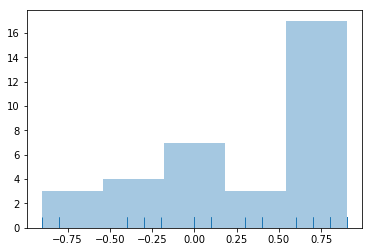

In [94]:
sns.distplot(sentiment_df, kde=False, bins=5, rug=True);

# Well it looks like overall people like this restaurant, so I think I will go there.

## Hopefully you got inspired with some use cases working with ML

# Here is the github link of this talk:
https://github.com/jcamier/dfw_google_vision_talk

## Thank you!